In [2]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
import sys
import math
from collections import namedtuple
import matplotlib.pyplot as plt
import random
from tqdm.notebook import tqdm

plt.rcParams['figure.figsize'] = [18, 13]

In [21]:
Point = namedtuple("Point", ['x', 'y'])

def length(point1, point2):
    return math.sqrt((point1.x - point2.x)**2 + (point1.y - point2.y)**2)

def objec(solution,points):
    nodeCount=len(points)
    obj = length(points[solution[-1]], points[solution[0]])
    for index in range(0, nodeCount-1):
        obj += length(points[solution[index]], points[solution[index+1]])
    return obj

def greedy_solve(points,s_node,k_nn):
    nodeCount=len(points)
    # visit the unvisited node that is closest to current node
    vis_list=[]
    # starts on random node
    #c_node=random.randint(0,nodeCount-1)
    c_node=s_node
    vis_list.append(c_node)
    for i in tqdm(range(nodeCount-1)):
        #checks available nodes
        av_nodes = [n for n in list(range(0,nodeCount)) if n not in vis_list]
        # first choose k_nn and check availability
        found=0
        # go through k_nn starting closest to c_node and check if available
        for i in k_nn[c_node]:
            if i in av_nodes:
                found=1
                next_node=i
                break
            else:
                next_node = min(av_nodes,key=lambda x:length(points[c_node],points[x]))
        # update current node        
        c_node=next_node
        vis_list.append(c_node) 
    solution = vis_list
    return solution

def sol_plot(solution,points):
    nodeCount=len(points)
    # plot the solution
    j=0
    for i in points:
        plt.plot(i.x, i.y,'ko')
        #plt.annotate(j,(i.x, i.y))
        j=j+1
    
    for i in range(-1, nodeCount-1):
        plt.plot((points[solution[i]].x, points[solution[i+1]].x),
                 (points[solution[i]].y, points[solution[i+1]].y),'-')
    
def data_plot(points):
    nodeCount=len(points)
    # plot the solution
    j=0
    for i in points:
        plt.plot(i.x, i.y,'rx')
        #plt.annotate(j,(i.x, i.y))
        j=j+1

def reverse_segment_if_better(tour, i, j, k, points):
    """If reversing tour[i:j] would make the tour shorter, then do it."""
    # Given tour [...A-B...C-D...E-F...]
    A, B, C, D, E, F = tour[i-1], tour[i], tour[j-1], tour[j], tour[k-1], tour[k % len(tour)]
    A, B, C, D, E, F = points[A], points[B], points[C], points[D], points[E], points[F]
    
    d0 = length(A, B) + length(C, D) + length(E, F)
    d1 = length(A, C) + length(B, D) + length(E, F)
    d2 = length(A, B) + length(C, E) + length(D, F)
    d3 = length(A, D) + length(E, B) + length(C, F)
    d4 = length(F, B) + length(C, D) + length(E, A)

    if d0 > d1:
        tour[i:j] = reversed(tour[i:j])
        return -d0 + d1
    elif d0 > d2:
        tour[j:k] = reversed(tour[j:k])
        return -d0 + d2
    elif d0 > d4:
        tour[i:k] = reversed(tour[i:k])
        return -d0 + d4
    elif d0 > d3:
        tmp = tour[j:k] + tour[i:j]
        tour[i:k] = tmp
        return -d0 + d3
    return 0
        
def three_opt(sol,points):
    """Iterative improvement based on 3 exchange."""
    while True:
        delta = 0
        for (a, b, c) in all_segments(len(sol)):
            delta += reverse_segment_if_better(sol, a, b, c,points)
            print(delta)
        if delta >= 0:
            break
    return sol

def all_segments(n: int):
    """Generate all segments combinations"""
    return ((i, j, k)
        for i in range(n)
        for j in range(i + 2, n)
        for k in range(j + 2, n + (i > 0)))
  

def solve_it(input_data,greedy=False,k=100):
    # parse the input
    lines = input_data.split('\n')

    nodeCount = int(lines[0])

    points = []
    for i in range(1, nodeCount+1):
        line = lines[i]
        parts = line.split()
        points.append(Point(float(parts[0]), float(parts[1])))
    print('Points Parsed!')
    
    s0=random.sample(range(nodeCount), nodeCount)
    # plot solution
    plt.subplot(1,2,1)
    sol_plot(s0,points)
    plt.grid(1)
    # find an improved solution with simulated annealing 2-opt neighborhood

    
    # NOTE1: Relate temperature with edge_length (Uncertain, perhaps unnecessary)
    # NOTE2: Try doing grid searched annealing runs and get the best (TOO EXPENSIVE ON THE FLY)
    # NOTE3: Include swaps in the neighborhood (WORSE THAN 2OPT)
    # NOTE4: Keep track of best solution and break if it doesn't improve for a while,
    #        afterwards do new SA run with different parameters. (May be surpassed by good sched.)
    # NOTE5: Use cached k-nearest neighbors instead of full nearest neighbors
    # NOTE6: Implement 2-OPT Heuristic and check runtime (BAD)
    # NOTE7: Keep list of k-nearest neighbors, in SA: 1.select random node, 2. select random
    #        node from nearest neighbor list, 3. perform 2opt swap and submit    
    s=s0
    
    solution=three_opt(s,points)
    
    print('Start Obj:',objec(s0,points))
    print('End Obj:',objec(solution,points))
    print('Delta Obj:',objec(s0,points)-objec(solution,points))
    

    
    plt.subplot(1,2,2)
    sol_plot(solution,points)
    
    obj=objec(solution,points)

    # prepare the solution in the specified output format
    output_data = '%.2f' % obj + ' ' + str(0) + '\n'
    output_data += ' '.join(map(str, solution))

    return output_data

Points Parsed!
0
0
0
Start Obj: 16511.93848174291
End Obj: 16511.93848174291
Delta Obj: 0.0
16511.94 0
45 239 367 254 38 237 332 48 360 244 55 368 203 200 0 208 2 74 255 72 138 99 336 229 220 214 100 21 314 103 238 94 46 319 328 225 127 366 316 135 15 84 13 1 81 385 216 266 4 354 35 62 43 287 51 301 182 60 24 114 313 191 86 58 112 361 31 289 364 250 37 108 377 146 85 233 57 36 320 174 278 148 380 243 327 344 374 28 118 9 3 391 355 165 158 284 358 107 389 197 252 294 168 396 228 362 224 399 130 188 155 42 139 180 373 283 264 142 240 270 352 326 384 77 286 386 111 147 88 199 253 398 276 83 10 156 33 194 288 105 67 116 363 372 212 183 218 223 39 297 87 97 241 190 317 395 306 359 263 115 268 275 140 206 271 353 78 122 205 350 335 257 248 141 12 29 145 178 318 235 383 70 234 5 322 246 52 247 323 390 222 231 258 23 44 162 161 53 144 259 128 261 341 312 149 300 195 267 119 196 75 50 110 329 106 357 126 92 347 309 143 356 291 157 166 221 56 307 153 159 98 184 338 201 321 64 8 299 210 331 131 7

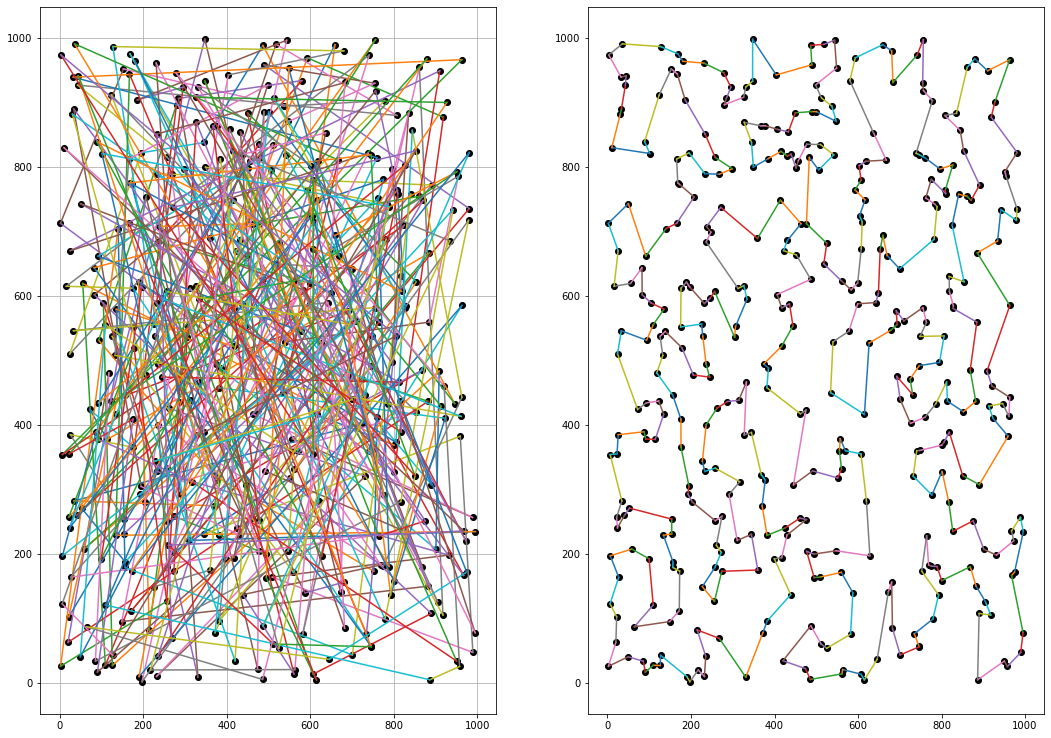

In [22]:
import os
notebook_path = os.path.abspath("Notebook.ipynb")
data_path = os.path.join(os.path.dirname(notebook_path), "data\\tsp_400_1")

if len(data_path) > 1:
    file_location = data_path.strip()
    with open(file_location, 'r') as input_data_file:
        input_data = input_data_file.read()
        print(solve_it(input_data))